c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\_version_utils.py:47: FutureWarning: The argument `x_0` is deprecated for __init__; use `u_0` instead.
  warnings.warn(f'The argument `{alias}` is deprecated for {func_name}; use `{new}` instead.', FutureWarning)
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\networks.py:44: FutureWarning: `n_hidden_units` and `n_hidden_layers` are deprecated, pass `hidden_units=(50, 50, 50, 50, 50, 50, 50)` instead
  warn(f"`n_hidden_units` and `n_hidden_layers` are deprecated, "
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\solve

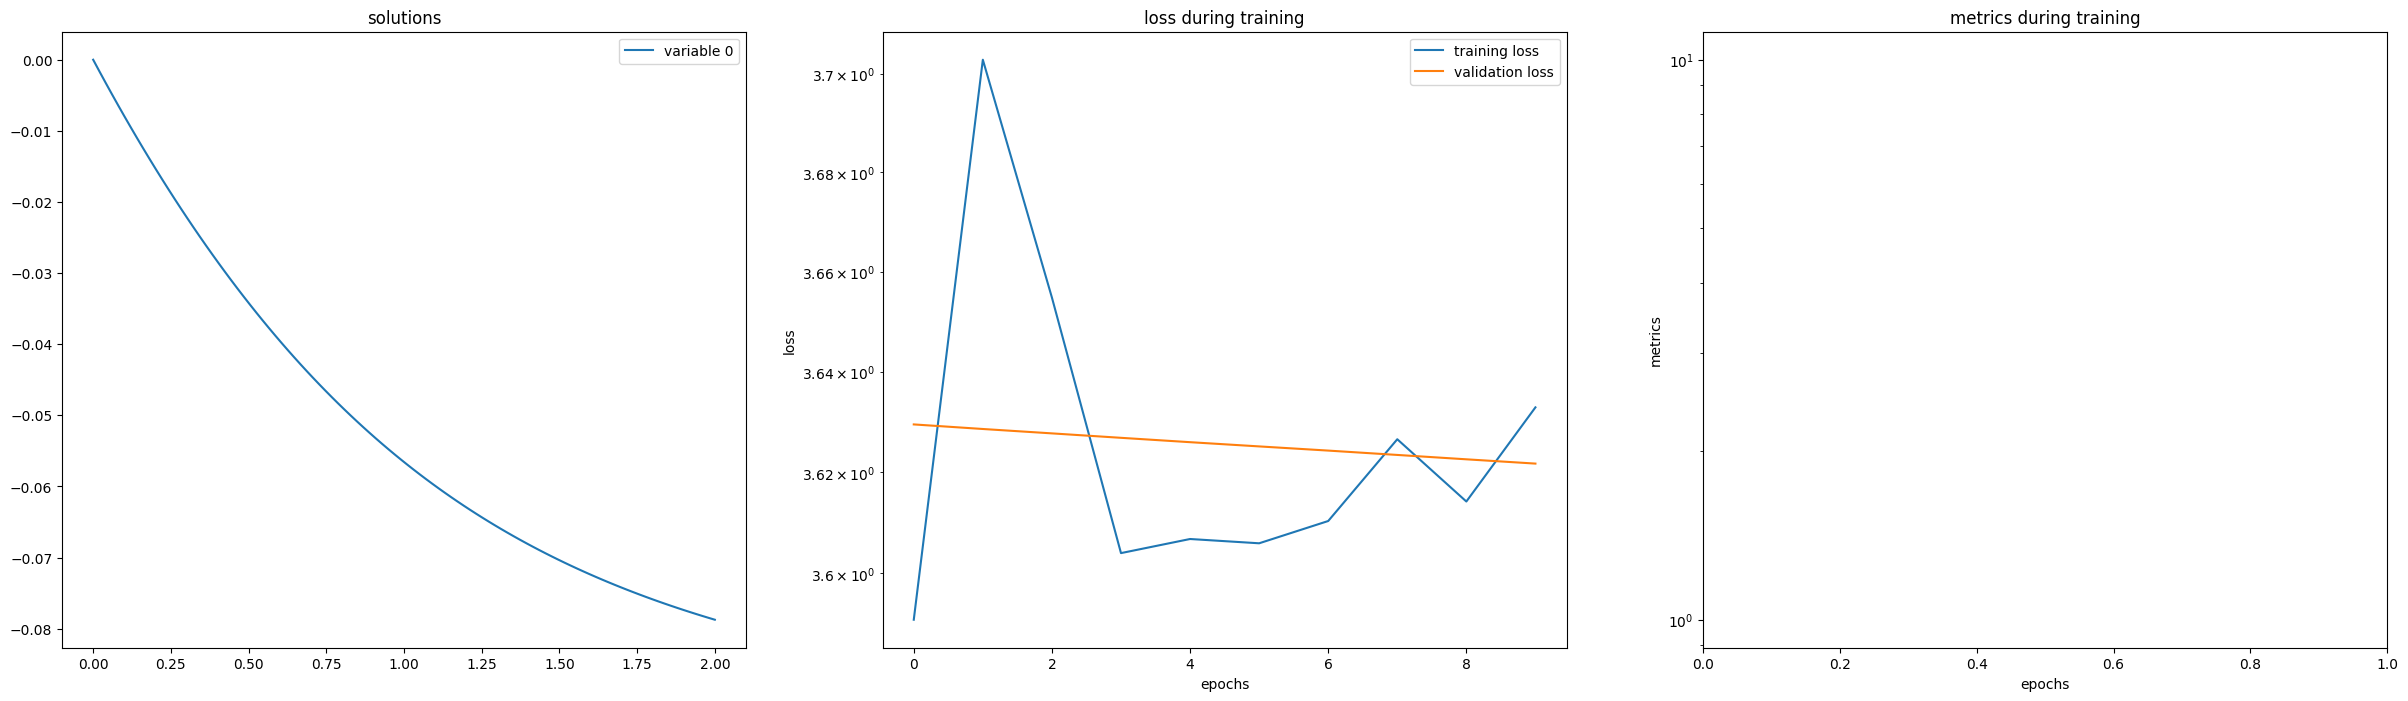

Training Progress: 100%|██████████| 1000/1000 [00:33<00:00, 29.81it/s]
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\_version_utils.py:47: FutureWarning: The argument `as_type` is deprecated for __call__; use `to_numpy` instead.
  warnings.warn(f'The argument `{alias}` is deprecated for {func_name}; use `{new}` instead.', FutureWarning)


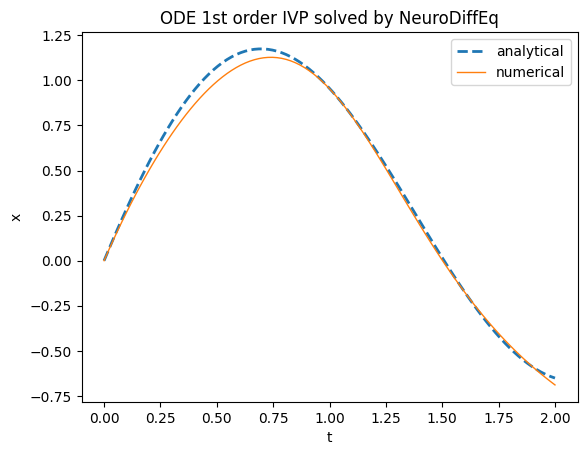

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from neurodiffeq import diff
from neurodiffeq.ode import solve
from neurodiffeq.ode import IVP
import neurodiffeq.networks as ndenw
from neurodiffeq.monitors import Monitor1D

ode_fn = lambda x, t: diff(x, t, order=1) + x - torch.sin(t) - 3. * torch.cos(2. * t)

an_sol = lambda t : (1./2.) * np.sin(t) - (1./2.) * np.cos(t) + \
                    (3./5.) * np.cos(2.*t) + (6./5.) * np.sin(2.*t) - \
                    (1./10.) * np.exp(-t)

t_begin=0.
t_end=2.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = IVP(t_0=t_begin, x_0=0.0)

x_an_sol = an_sol(t_space)

net = ndenw.FCNN(n_hidden_layers=6, n_hidden_units=50, actv=torch.nn.Tanh)
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
num_sol, loss_sol = solve(ode_fn, x_init, t_min=t_begin, t_max=t_end,
	batch_size=30,
	max_epochs=1000,
	return_best=True,
	net=net,
	optimizer=optimizer,
	monitor=Monitor1D(t_min=t_begin, t_max=t_end, check_every=10))
x_num_sol = num_sol(t_space, as_type='np')

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical')
plt.title('ODE 1st order IVP solved by NeuroDiffEq')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()